# Palmerpenguins


## About the data

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset contains data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica.

## Attributes


    species: penguin species (Chinstrap, Adélie, or Gentoo)
    culmen_length_mm: culmen length (mm)
    culmen_depth_mm: culmen depth (mm)
    flipper_length_mm: flipper length (mm)
    body_mass_g: body mass (g)
    island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    sex: penguin sex
    
    
## What are culmen length & depth?

The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages). 

For this penguin data, the culmen (bill) length and depth are measured as shown below (thanks Kristen Gorman for clarifying!):

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" alt="Measuring bill length and depth" />


In [1]:
# import necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

import ipywidgets as widgets
from ipywidgets import interact

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings('ignore')

# Preprocessing the data

In [2]:
penguins = pd.read_csv("penguins_cluster/penguins_size.csv")

In [3]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
#Getting the shape of dataset with rows and columns
print(" rows ,columns")
print(penguins.shape)

 rows ,columns
(344, 7)


In [5]:
#check details about the data set
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
#check if data contains empty cells
penguins.isna().sum().sort_values(ascending=False)/penguins.shape[0]

sex                  0.029070
culmen_length_mm     0.005814
culmen_depth_mm      0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
species              0.000000
island               0.000000
dtype: float64

In [7]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Some Values missing in most attributes. We will deal with it later.

In [8]:
#Checking for Duplicates
value=len(penguins[penguins.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


## Data analysis

[Text(0.5, 1.0, 'Length of culmen per species')]

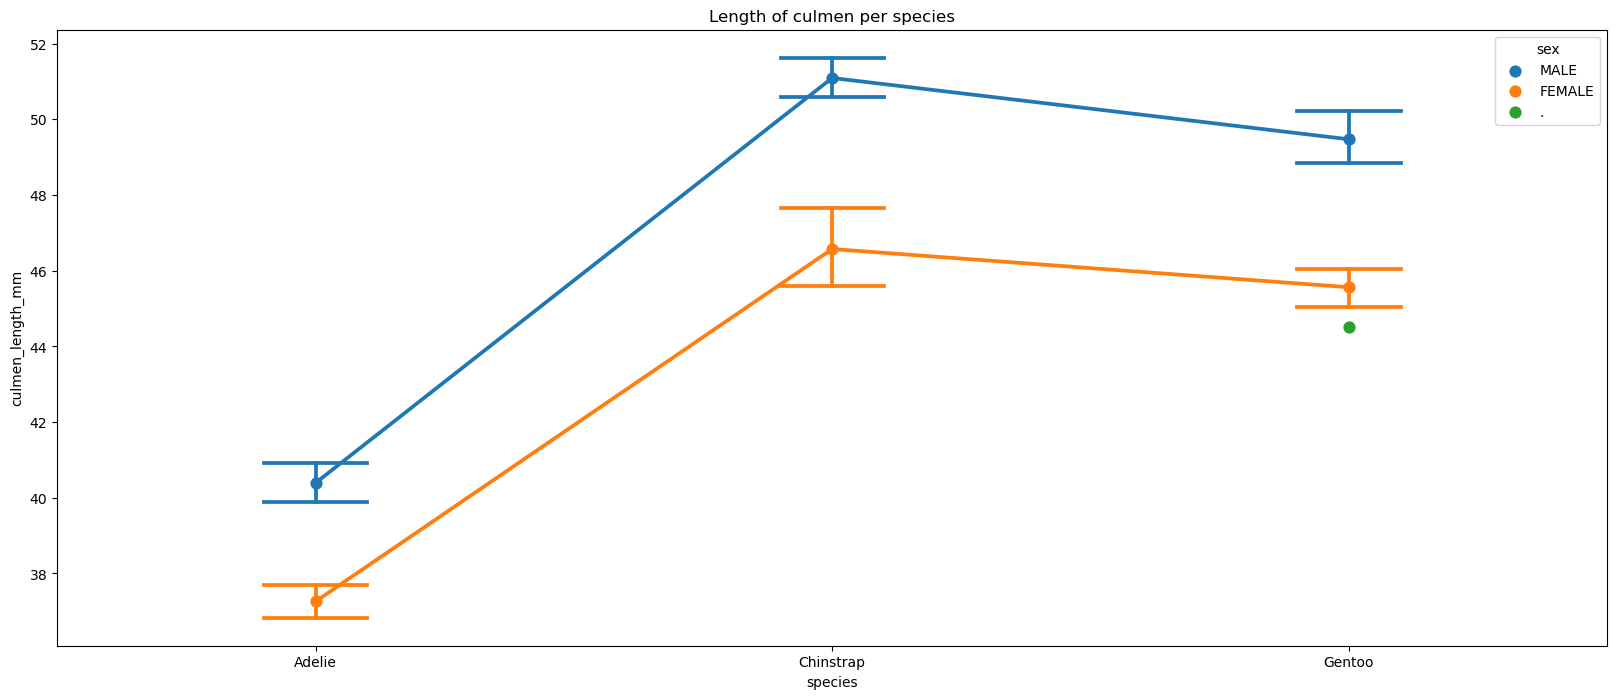

In [9]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=penguins,x='species',y='culmen_length_mm',hue='sex',ax=ax,capsize=.2)
ax.set(title='Length of culmen per species')

[Text(0.5, 1.0, 'Depth of culmen per species')]

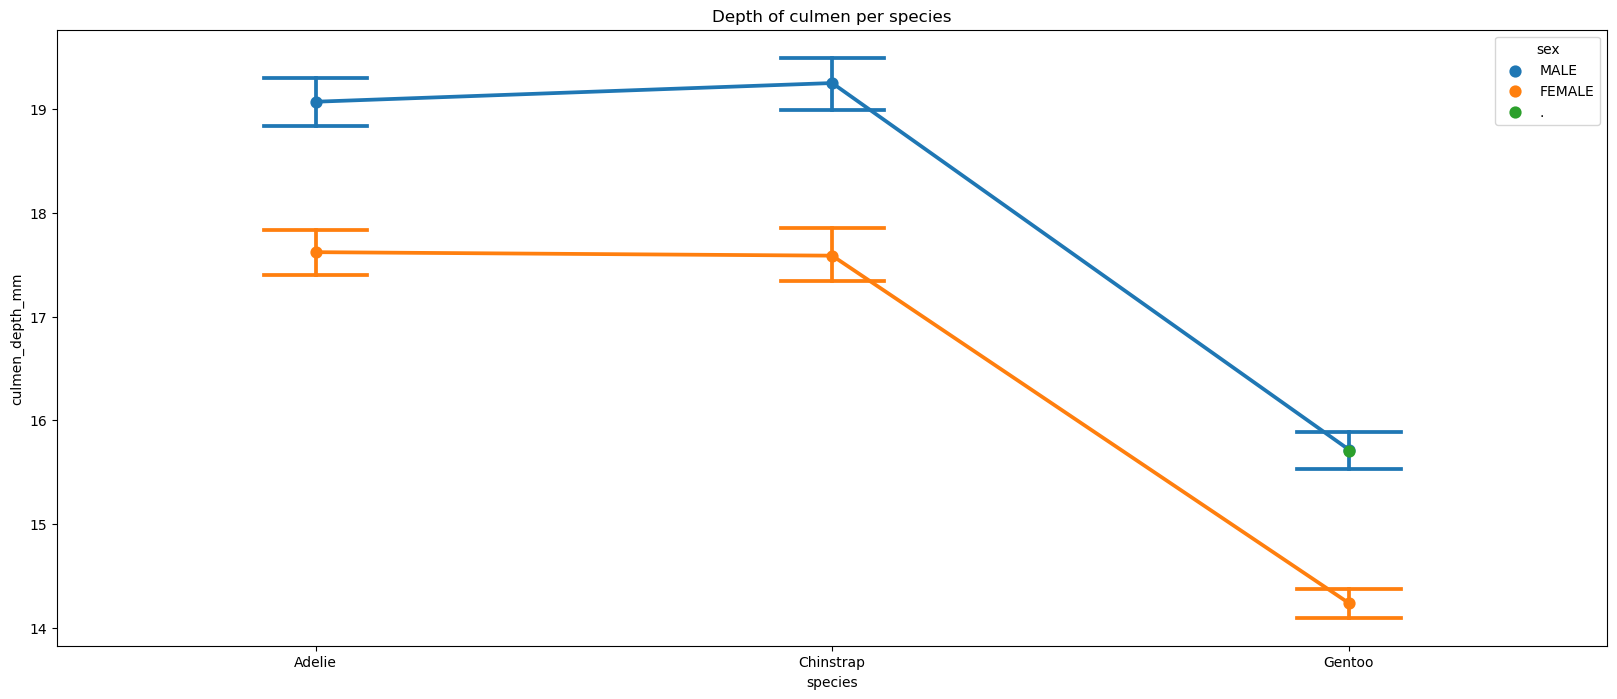

In [10]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=penguins,x='species',y='culmen_depth_mm',hue='sex',ax=ax,capsize=.2)
ax.set(title='Depth of culmen per species')

[Text(0.5, 1.0, 'Length of flipper per species')]

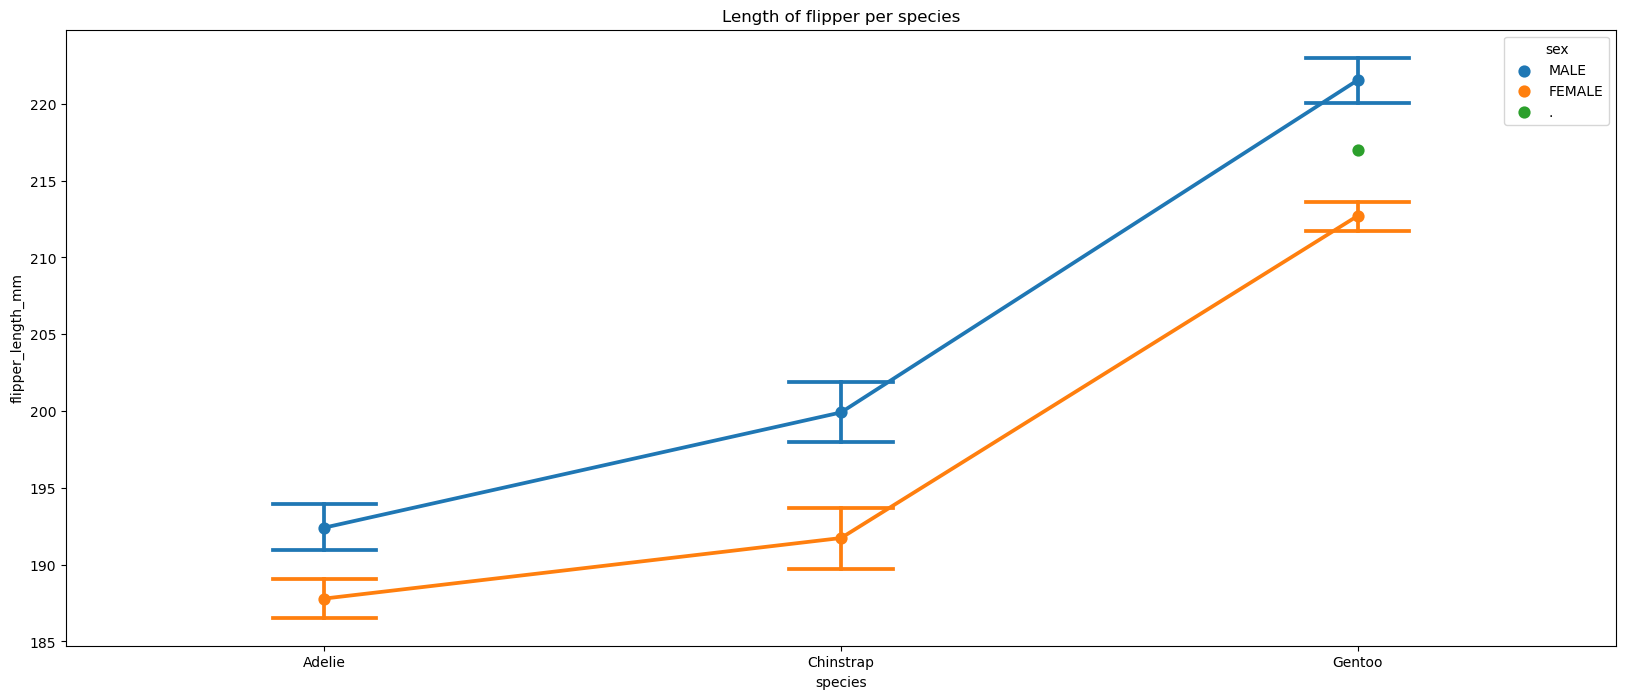

In [11]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=penguins,x='species',y='flipper_length_mm',hue='sex',ax=ax,capsize=.2)
ax.set(title='Length of flipper per species')

[Text(0.5, 1.0, 'Weight per species')]

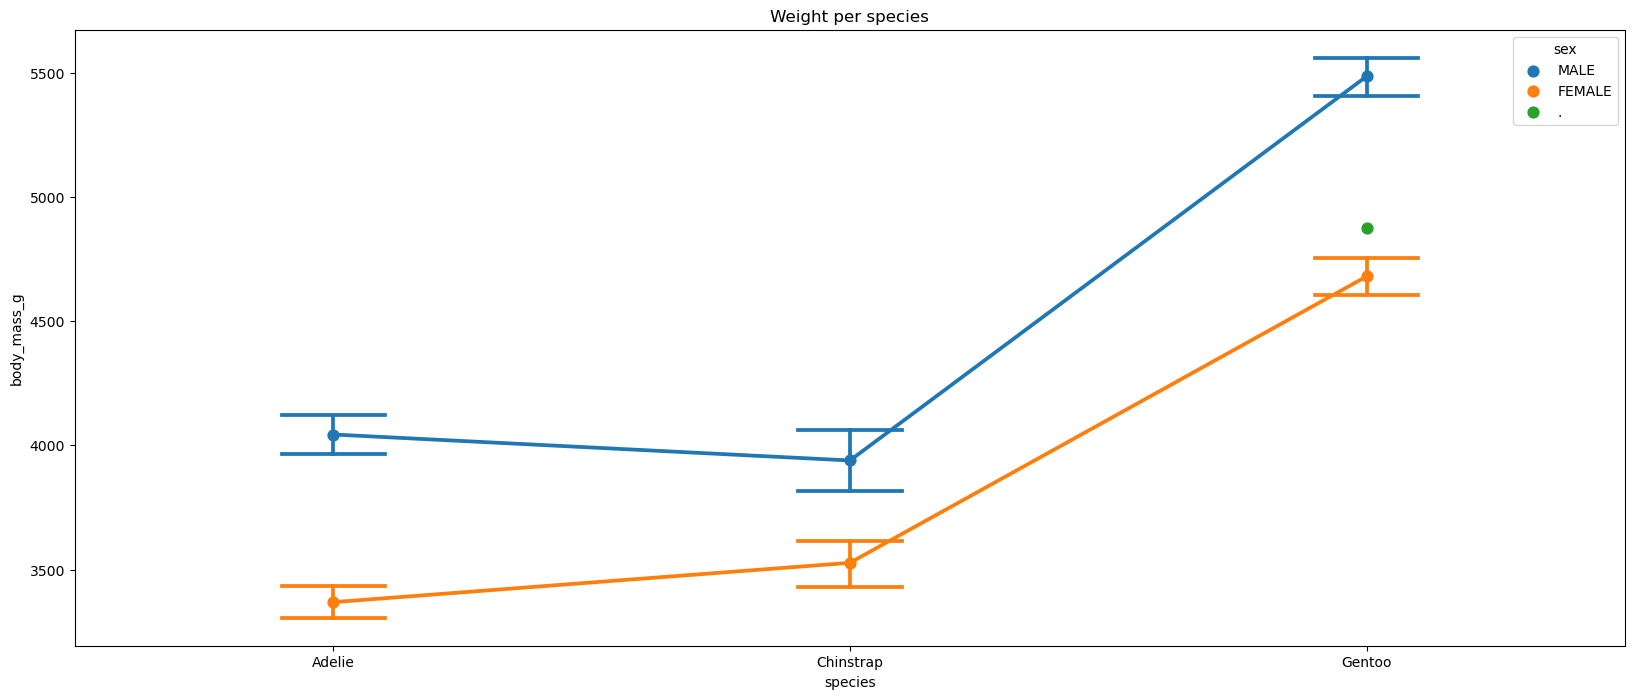

In [12]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=penguins,x='species',y='body_mass_g',hue='sex',ax=ax,capsize=.2)
ax.set(title='Weight per species')

## Analysis:

Adelie and Chinstrap are very similar species only having significant differences in culmen length.
Gentoo are not similar to Adelie at all and only share common features with Chinstraps when it comes to the Length of the culmen.
<br><br>
Female penguins are on average lighter, have shorter flipper arms and culmen and have less deep culmen.

# Predict the species

For this part, we will build a model that will predict the species of the penguin. <br>

But first, we need to do some small changes to the data

In [13]:
#In neither model we do need the location of the penguin, so we can drop it here

penguins = penguins.drop(["island"], axis=1)
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE


Both species and sex are non numerical. We need to change that.

In [14]:
#Change species to a numerical value
penguins['species'] = pd.factorize(penguins['species'])[0]
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,MALE
1,0,39.5,17.4,186.0,3800.0,FEMALE
2,0,40.3,18.0,195.0,3250.0,FEMALE
3,0,NaN,NaN,NaN,NaN,NaN
4,0,36.7,19.3,193.0,3450.0,FEMALE


In [15]:
penguins.tail()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,2,NaN,NaN,NaN,NaN,NaN
340,2,46.8,14.3,215.0,4850.0,FEMALE
341,2,50.4,15.7,222.0,5750.0,MALE
342,2,45.2,14.8,212.0,5200.0,FEMALE
343,2,49.9,16.1,213.0,5400.0,MALE


0 does now represent Adeline, 1 represents Chinstrap and 2 Gentoo.

In [16]:
#Change sex to a numerical value
penguins['sex'] = pd.factorize(penguins['sex'])[0]
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
3,0,NaN,NaN,NaN,NaN,-1
4,0,36.7,19.3,193.0,3450.0,1


Now 0 represents male, 1 represents female

In [17]:
#change dtype accordingly
cols=['species', 'sex']
for col in cols:
  penguins[col]=penguins[col].astype('int64')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                344 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 16.2 KB


We will be using a cluster, which would normaly give higher weight to higher numbers. To balance this, we will scale the attributes

In [18]:
columns = list(penguins.columns.values)

scaler = StandardScaler()
penguins = scaler.fit_transform(penguins)

#convert numpy back to pandas
penguins = pd.DataFrame(penguins, columns=columns)
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-1.029802,-0.884499,0.785449,-1.418347,-0.564142,-0.817011
1,-1.029802,-0.811126,0.126188,-1.062250,-0.501703,0.973127
2,-1.029802,-0.664380,0.430462,-0.421277,-1.188532,0.973127
3,-1.029802,NaN,NaN,NaN,NaN,-2.607148
4,-1.029802,-1.324737,1.089724,-0.563715,-0.938776,0.973127


## Specific preperation

We don't need sex to determine species. We'll copy the data so we can use the original in part 2 again. We will also drop Weight to get a 3 dimensinal cluster which we can actually display. From the analysis we looked at, even 2 should work just fine.

In [19]:
penguins_species = penguins.drop(["sex"], axis=1)
penguins_species.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-1.029802,-0.884499,0.785449,-1.418347,-0.564142
1,-1.029802,-0.811126,0.126188,-1.062250,-0.501703
2,-1.029802,-0.664380,0.430462,-0.421277,-1.188532
3,-1.029802,NaN,NaN,NaN,NaN
4,-1.029802,-1.324737,1.089724,-0.563715,-0.938776


In [20]:
#We can't use incomplete data, we drop rows with NaN's
penguins_species = penguins.dropna()

In [21]:
penguins_species.isna().sum()

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [22]:
#save species for evaluting

true_labels = penguins_species["species"]
penguins_species = penguins_species.drop(["species"], axis=1)

# Building the model

<IPython.core.display.Javascript object>


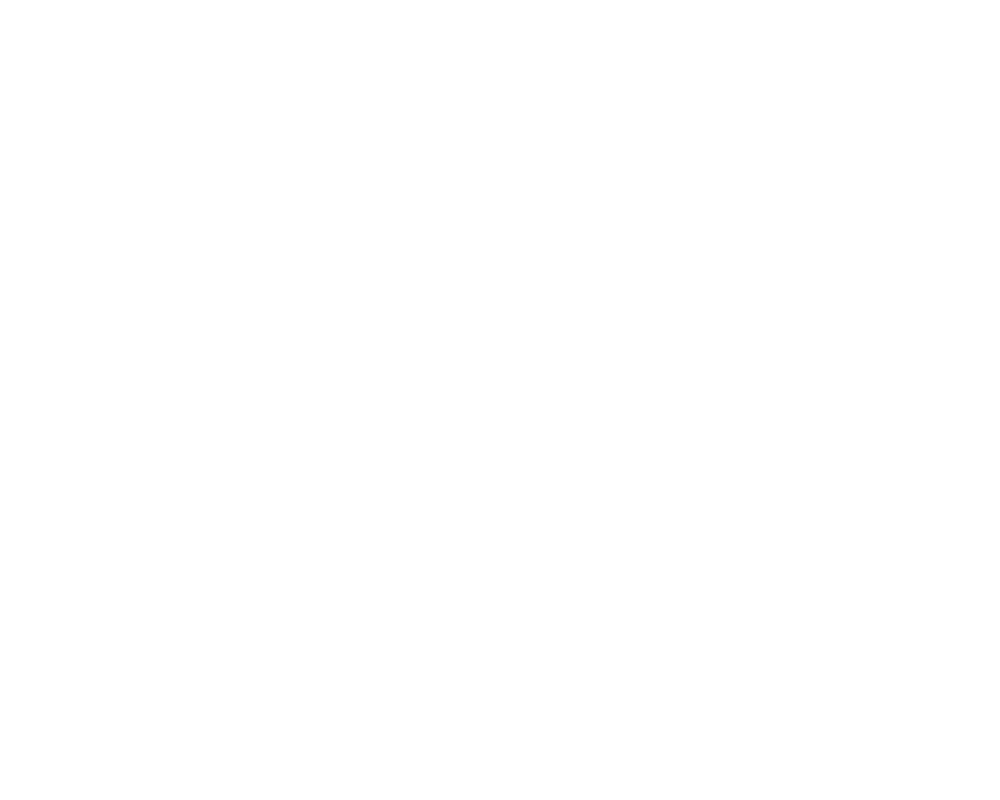

In [23]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
#setup model
#since we already know there are 3 species, we don't need to do the elbow curve
kmeans = KMeans(n_clusters=3, random_state=24 )

#train the model
y =  kmeans.fit_predict(penguins_species)


#centroids = kmeans.cluster_centers_
# Put assigned labels to the original dataset..
penguins_species['cluster'] = y

fg = ax.scatter3D(penguins_species["culmen_length_mm"], penguins_species["culmen_depth_mm"], penguins_species["flipper_length_mm"],
                marker="*", cmap="RdYlGn", c=penguins_species["cluster"])

ax.set_xlabel("culmen_length")
ax.set_ylabel("culmen_depth")
ax.set_zlabel("flipper_length")

#Data for three-dimensional scattered points


plt.colorbar(fg)
plt.title("Species")
plt.show()

In [24]:
kmeans.inertia_

617.9401663008518

In [25]:
kmeans.n_iter_

3

In [26]:
# Compute the silhouette scores
kmeans_silhouette = silhouette_score(
    penguins_species, kmeans.labels_
).round(2)
print(kmeans_silhouette)

0.51


In [27]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
print(ari_kmeans)

0.5470789436592745


Kmeans is not suitable for this.
## Let's try DBScan

In [28]:
dbscan = DBSCAN(eps=1.3)

#fit the data and train
dbscan.fit_predict(penguins_species)

# Compute the silhouette scores
dbscan_silhouette = silhouette_score(
   penguins_species, dbscan.labels_
).round (2)
print(dbscan_silhouette)

0.53


In [29]:
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print(round(ari_dbscan, 2))

0.36
